In [2]:
#Tugas 1: modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Guru", "Memancing","Pria" ), ("Budi", 23, "Tukang parkir", "Memancing", "Pria"), ("Citra", 29, "Kasir", "Memancing", "wanita"), ("Dina", 45, "Kasir", "Memancing", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan","Hobi","Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+-------------+---------+------+
| Nama|Usia|    Pekerjaan|     Hobi|Gender|
+-----+----+-------------+---------+------+
|  Ali|  34|         Guru|Memancing|  Pria|
| Budi|  23|Tukang parkir|Memancing|  Pria|
|Citra|  29|        Kasir|Memancing|wanita|
| Dina|  45|        Kasir|Memancing|Wanita|
+-----+----+-------------+---------+------+



In [3]:
#Tugas 2: Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

# Filtering data
df_filtered = df.filter(df['Gender'] == "Pria")
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=True)
df_sorted.show()


+----+----+-------------+---------+------+
|Nama|Usia|    Pekerjaan|     Hobi|Gender|
+----+----+-------------+---------+------+
| Ali|  34|         Guru|Memancing|  Pria|
|Budi|  23|Tukang parkir|Memancing|  Pria|
+----+----+-------------+---------+------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+-------------+---------+------+
| Nama|Usia|    Pekerjaan|     Hobi|Gender|
+-----+----+-------------+---------+------+
| Budi|  23|Tukang parkir|Memancing|  Pria|
|Citra|  29|        Kasir|Memancing|wanita|
|  Ali|  34|         Guru|Memancing|  Pria|
| Dina|  45|        Kasir|Memancing|Wanita|
+-----+----+-------------+---------+------+



In [4]:
#Tugas 3: Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]
               ,"Pekerjaan" : ["Guru","Tukang parkir", "Kasir", "Kasir"], "Gender":["Pria","Pria","Wanita","Wanita"]
               }
df_pandas = pd.DataFrame(data_pandas)

#Filtering Data berdasarkan usia
df_pandas_filtered = df_pandas[df_pandas['Usia'] > 23]

# Menampilkan DataFrame Pandas
df_pandas_filtered

,Nama,Usia,Pekerjaan,Gender
0,Ali,34,Guru,Pria
2,Citra,29,Kasir,Wanita
3,Dina,45,Kasir,Wanita


    Nama  Usia      Pekerjaan  Gender       Hobi
0    Ali    34           Guru    Pria  Memancing
1   Budi    23  Tukang parkir    Pria  Memancing
2  Citra    29          Kasir  Wanita   Berenang
3   Dina    45          Kasir  Wanita       Lari


            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


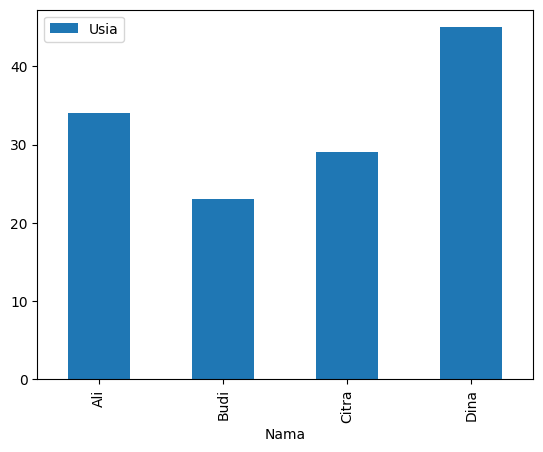

In [8]:
#Tugas 4: Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.
# Membuat DataFrame kedua
import pandas as pd

# DataFrame dari Tugas 3
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45],
    "Pekerjaan": ["Guru","Tukang parkir", "Kasir", "Kasir"],
    "Gender": ["Pria","Pria","Wanita","Wanita"]
}
df_pandas = pd.DataFrame(data_pandas)

data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Hobi": ["Memancing", "Memancing", "Berenang", "Lari"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print("\n")
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas.plot(x="Nama", y="Usia",kind='bar')
plt.show()


In [6]:
#Tugas 5: Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia.
from pyspark.sql import SparkSession
import pandas as pd
# Membuat DataFrame Pyspark
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()
data = [("Ali", 34, "Guru","Pria" ), ("Budi", 23, "Tukang parkir",  "Pria"), ("Citra", 29, "Kasir",  "wanita"), ("Dina", 45, "Kasir", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan","Gender"]
df = spark.createDataFrame(data, columns)
df.show()
#Mengonversi DataFrame dari Pyspark ke Pandas
df_pandas_from_spark = df.toPandas()

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Yanto", "Boby", "Yanti", "Siti"], "Usia": [37, 33, 39, 35]
               ,"Pekerjaan" : ["CTO","CEO", "Kasir", "Guru"], "Gender":["Pria","Pria","Wanita","Wanita"]
               }
df_pandas = pd.DataFrame(data_pandas)
print(df_pandas)

#Menggabungkan Data
df_joined = pd.merge(df_pandas_from_spark, df_pandas, how="outer")
print("\n")
print(df_joined)

#rata-rata
rata2 = df_joined['Usia'].mean()
print("\n Rata-rata usia:", rata2)


+-----+----+-------------+------+
| Nama|Usia|    Pekerjaan|Gender|
+-----+----+-------------+------+
|  Ali|  34|         Guru|  Pria|
| Budi|  23|Tukang parkir|  Pria|
|Citra|  29|        Kasir|wanita|
| Dina|  45|        Kasir|Wanita|
+-----+----+-------------+------+

    Nama  Usia Pekerjaan  Gender
0  Yanto    37       CTO    Pria
1   Boby    33       CEO    Pria
2  Yanti    39     Kasir  Wanita
3   Siti    35      Guru  Wanita


    Nama  Usia      Pekerjaan  Gender
0    Ali    34           Guru    Pria
1   Boby    33            CEO    Pria
2   Budi    23  Tukang parkir    Pria
3  Citra    29          Kasir  wanita
4   Dina    45          Kasir  Wanita
5   Siti    35           Guru  Wanita
6  Yanti    39          Kasir  Wanita
7  Yanto    37            CTO    Pria

 Rata-rata usia: 34.375


In [11]:
#Tugas 6: Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.
from pyspark.sql import SparkSession
import pandas as pd

# Membuat DataFrame Pyspark
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()
data = [("Ali", 34, "Guru","Pria" ), ("Budi", 23, "Tukang parkir",  "Pria"), ("Citra", 29, "Kasir",  "wanita"), ("Dina", 45, "Kasir", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan","Gender"]
df = spark.createDataFrame(data, columns)
df.show()
#Mengonversi DataFrame dari Pyspark ke Pandas
df_pandas_from_spark = df.toPandas()

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Yanto", "Boby", "Yanti", "Siti"], "Usia": [37, 33, 39, 35]
               ,"Pekerjaan" : ["CTO","CEO", "Kasir", "Guru"], "Gender":["Pria","Pria","Wanita","Wanita"]
               }
df_pandas = pd.DataFrame(data_pandas)
print(df_pandas)

#Menggabungkan Data
df_joined = pd.merge(df_pandas_from_spark, df_pandas, how="outer")
print("\n")
print(df_joined)

#Menghitung nilai maksimum usia.
maks_usia = df_joined["Usia"].max()
print("\n")
print('usia maksimal: ', maks_usia)

+-----+----+-------------+------+
| Nama|Usia|    Pekerjaan|Gender|
+-----+----+-------------+------+
|  Ali|  34|         Guru|  Pria|
| Budi|  23|Tukang parkir|  Pria|
|Citra|  29|        Kasir|wanita|
| Dina|  45|        Kasir|Wanita|
+-----+----+-------------+------+

    Nama  Usia Pekerjaan  Gender
0  Yanto    37       CTO    Pria
1   Boby    33       CEO    Pria
2  Yanti    39     Kasir  Wanita
3   Siti    35      Guru  Wanita


    Nama  Usia      Pekerjaan  Gender
0    Ali    34           Guru    Pria
1   Boby    33            CEO    Pria
2   Budi    23  Tukang parkir    Pria
3  Citra    29          Kasir  wanita
4   Dina    45          Kasir  Wanita
5   Siti    35           Guru  Wanita
6  Yanti    39          Kasir  Wanita
7  Yanto    37            CTO    Pria


usia maksimal:  45
